# Statistics for data science and measurement
## Babak Moghadas 1 and Brian Caffo 1, 2
### 1 Department of Biostatistics 
### 2 Department of Biomedical Engineering
### Bloomberg School of Public Health
### Johns Hopkins University

## About these slides

+ Goal is the least that you need to know
+ All slides are created in Jupyter notebooks - free to use and open source
+ [Github repo](https://github.com/smart-stats/odsc_2023)
+ [pyglide](https://pypi.org/project/pyglide/) provides the interactivity

## Part 3 validation of ML algorithms

+ In this component, we'll discuss validating the output of ML algorithms.
+ Typically, we split the data into:
   + **Training data**: data used to train the model.
   + **validation data**: data used to choose hyperparameters, such as layers in a neural network.
   + **testing data**: data used only for final evaluation of the model.

### Binary outcomes (two-class classification)

Consider the following definitions for the results of a diagnostic test $\hat Y\in \{0,1\}$, where the
actual disease state is $Y\in \{0,1\}$. Assume 1 represents having/testing for the disease.


#### Measures conditional on disease status:
1. **Sensitivity** $P(\hat Y =1 ~|~ Y=1)$, probability that the prediction is positive given the disease is present.
   + Also called the true positive rate.  
   + $P(\hat Y =0 ~|~ Y=1)$, one minus the sensitivity, is the false positive or miss rate.
   + Also called recall and hit rate
2. **Specificity** $P(\hat Y=0 ~|~ Y=0)$, probability that the prediction is negative given the disease is absent.
    + Also called the true negative rate. 
    + $P(\hat Y=1~|~ Y=0)$, one minus the specificity is the false negative rate or fall out.
    + Also called selectivity.

#### Measures conditional on the data

3. **PPV**, positive predictive value $P(Y=1 ~|~ \hat Y=1)$.
    + Also called the precision
4. **NPV**, negative predictive value $P(Y=0 ~|~ \hat Y =0)$. 

#### Other measures

5. **DLR+**, diagnostic likelihood ratio of a positive prediction $P(\hat Y=1 ~|~ Y=1) / P(\hat Y=1 ~|~ Y= 0)$ is also the sensitivity over one minus the specificity, i.e. the true positive rate divided by the false positive rate.
6. **DLR-**, diagnostic likelihood ratio of a negative prediction $P(\hat Y=0 ~|~ Y=1) / P(\hat Y=0 ~|~ Y=0)$ is one minus the sensitivity divided by the specificity or the false negative rate divided by the true negative rate. 
7. The **disease prevalence** is $P(Y=1)$ (and, generally less discussed, the prediction disease prevalance $P(\hat Y =1)$.)
8. The accuracy is $P(\hat Y = y) = P(\hat Y = 1 ~|~ Y = 1) P(Y = 1) + P(\hat Y = 0 ~|~ Y = 0) P(Y = 0)$, which is the sensitivity times the prevalence plus the specificity times one minus the prevalance.


##### Role of sampling in estimation

+ If you have a cross-sectional sample, then all of these quatities are directly estimable. 
+ If the data were sampled by disease status, or data was augmented to force outcome balance, then $Y$ should be conditioned and the sensitivity, specificity and DLR+/- are directly estimable. 
    + You can obtain the PPV and NPV using Bayes' rule given a disease prevalance.  
+ In a rare setting where the design fixes the prediction result, the NPV and PPV would be directly estimable and one would have to use the prevalance of a positive prediction and Bayes' rule to obtain the sensitivity and specificity. 
+ Accuracy depends on the prevalence, so imbalance in the outcome categories bounds a reasonable accuracy.

### Basic example

A study comparing the efficacy of HIV tests, reports on an experiment which concluded that HIV antibody tests have a sensitivity of 99.7% and a specificity of 98.5%. 

Suppose that a subject, from a population with a .1% prevalence of HIV, receives a positive test result. What is the positive predictive value?


+ Mathematically, we want $P(Y=1 | \hat Y=1)$ 
+ We have:
  + the sensitivity, 
  $$P(\hat Y=1 | Y=1) = .997$$
  + the specificity, 
  $$P(\hat Y=0 | Y=0) =0.985$$
  + the prevalence 
  $$P(Y=1) =0.001$$

#### Bayes's rule
$$
\begin{align*} 
\small P(Y=1 ~|~ \hat Y =1) & = \frac{\small P(\hat Y =1 ~|~ Y=1)\small P(Y=1)}{\small P(\hat Y=1~|~Y=1)\small P(Y=1) + \small P(\hat Y=1 ~|~ Y=0)\small P(Y=0)}\\
               & = \frac{\small P(\hat Y=1|Y=1)\small P(Y=1)}{\small P(\hat Y=1|Y=1)\small P(Y=1) + (1 - \small P(\hat Y=0 ~|~ Y = 0))(1 - \small P(Y=1))} \\
               & = \frac{\small .997\times .001}{\small .997 \times .001 + .015 \times .999}\ = \small .062 
\end{align*}
 
$$


#### DLR

$$
P(Y = 1 ~|~ \hat Y = 1) = \frac{P(\hat Y=1~|~ Y = 1)P(Y=1)}{P(\hat Y=1)} 
$$

and

$$ P(Y=0 ~|~ \hat Y=1) = \frac{P(\hat Y=1 ~|~ Y=0)P(Y=0)}{P(\hat Y=1)}. $$


$$ 
\frac{P(Y = 1 ~|~ \hat Y=1)}{P(Y=0 ~|~ \hat Y=1)} = \frac{P(\hat Y = 1 ~|~ Y=1)}{P(\hat Y = 1 ~|~ Y=0)}\times \frac{P(Y=1)}{P(Y=0)} 
$$


#### DLR continued

+ In other words, the post test odds of disease is the pretest odds of disease times the $DLR_+$. 
+ Similarly, $DLR_-$ relates the decrease in the odds of the disease after a negative test result to the odds of disease prior to the test. 
+ DLRs are the factors by which you multiply your pretest odds to get your post test odds. 

#### DLR+ example

+ Suppose a subject has a positive HIV test, $DLR_+ = .997 / (1 - .985) = 66$. 
+ The result of the positive test is that the odds of disease is now 66 times the pretest odds. 
+ Or, equivalently, the hypothesis of disease is 66 times more supported by the data than the hypothesis of no disease


#### DRL- example

+ Suppose instead that a subject has a negative test result. 
+ Then $DLR_- = (1 - .997) / .985 =.003$ 
+ Therefore, the post-test odds of disease is now 0.3% of the pretest odds given the negative test. 
+ Or, the hypothesis of disease is supported $.003$ times that of the hypothesis of absence of disease given the negative test result


#### ROC curves

+ The measures covered above require a binary diagnostic value. Typically our ML algorithms give a range.
+ Often 50% (estimated more likely than not) is not a reasonable cutoff.
+ ROC curves consider the sensitivity and 1-specificity; i.e. the true positive and false positive rate, for all possible cutoffs

In [8]:
import pandas as pd
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo"\
    "/ds4bme_intro/master/data/oasis.csv")
dat[ ['FLAIR', 'GOLD_Lesions'] ].head()

,FLAIR,GOLD_Lesions
0,1.143692,0
1,1.652552,0
2,1.036099,0
3,1.037692,0
4,1.580589,0


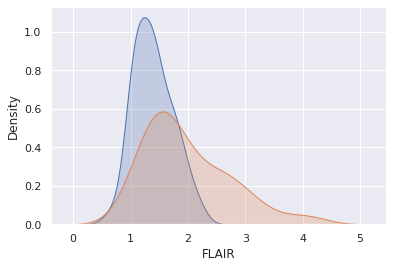

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
x0 = dat['FLAIR'][dat['GOLD_Lesions'] == 0]
x1 = dat['FLAIR'][dat['GOLD_Lesions'] == 1]
sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')
plt.show();

#### The ROC curve
+ Consider a given FLAIR threshold, say $c$. 
+ The true positive rate given that threshold is $T(c) = P(X \geq c ~|~ Y=1)$ 
+ The false positive rate is $F(c) = P(X \geq c~|~ Y=0 )$. 
+ The function $f\rightarrow T\{F^{-1}(f)\}$ is the ROC curve.
+ The ROC curve is typically displayed in the plot: $(f, T\{F^{-1}(f)\})$
+ An empirical estimate of the ROC curve requires empirical estimates of $T$ and $F$ which can be done non-parametrically or parametrically. 


#### The ROC curve satisfies:

1. Always starts at the point (0, 0). 
2. Always ends at the point (1, 1).  
3. Is monotonically increasing (always moves laterally or upward).
4. A uniformly better ROC curve lies entirely above a worse ROC curve. T
5. Is always worse than the theoretical limt of the ROC curve, the upper part of the box at the points (0, 0), (0, 1), (1, 1).  
6. If the prediction value is a random uniform number indpendent of the gold standard, the ROC curve is the identity line from (0, 0) to (1, 1). 
7. The ROC curve is invariant to strictly increasing monotonic transformations of the predictor. 
8. The ROC curve is an identity line whenever the prediction is independent of the gold standard provided the prediction is continuous. 
9. The ROC curve for a prediction as a test for one minus the golad standard flips the ROC curve over the identity line.

#### Non-parametric estimation

We can estimate these probabilities using the fraction of times a FLAIR values is above the threshold in the two gold standard groups

$$
\hat T(c)
= \frac{1}{|\Gamma_1|} \sum_{i \in \Gamma_1} I(x_i \geq c)
$$

$$
\hat F(c)
= \frac{1}{|\Gamma_0|} \sum_{i \in \Gamma_0} I(x_i \geq c)
$$

where $\Gamma_1 = \{i ~|~ y_i = 1\}$ and $\Gamma_0 = \{i ~|~ y_i = 0\}$.

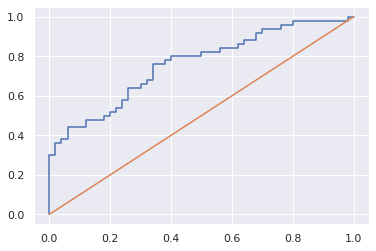

In [17]:
import numpy as np
x = dat['FLAIR']; y = dat['GOLD_Lesions']
c = np.concatenate( [[ np.min(x) - 1], np.sort(np.unique(x)) 
                     , [np.max(x) + 1]])
tpr = [np.mean( (x1 >= citer) ) for citer in c]
fpr = [np.mean( (x0 >= citer) ) for citer in c]
plt.plot(fpr, tpr);
plt.plot([0,1], [0,1]);

#### Binormal estimation

+ We could also assume distributional forms for $T$ and $F$ 
+ For example, suppose $X ~|~ Y=y \sim N(\mu_y, \sigma_y^2)$. 
+ Then, note if $\Phi$ is the standard normal distribution function then 
$$T(c) = 1 - \Phi\{ (c - \mu_1) / \sigma_1 \}$$ 
$$F(c) = 1 - \Phi\{ (c - \mu_0) / \sigma_0 \}$$ 
$$F^{-1}(f) = \mu_0 + \sigma_0 \Phi^{-1}(1-f)$$ 
+ Thus, the ROC curve is 
$$
T\{F^{-1}(f)\} = 1 - \Phi\left\{  \frac{\mu_0 -\mu_1}{\sigma_1} + \frac{\sigma_0}{{\sigma_1}} \Phi^{-1}(1-f) \right\}
$$
where $\mu_y$ and $\sigma_y$ can be estimated from the data.


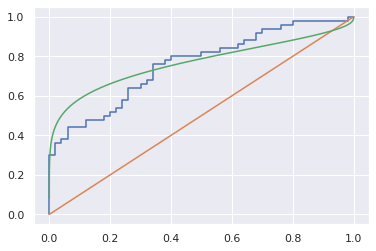

In [20]:
from scipy.stats import norm

mu0, mu1 = np.mean(x0), np.mean(x1)
s0, s1 = np.std(x0), np.std(x1)
c_seq = np.linspace(0, 3, 1000)

fpr_binorm = 1-norm.cdf(c_seq, mu0, s0)
tpr_binorm = 1-norm.cdf(c_seq, mu1, s1)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1]);
plt.plot(fpr_binorm, tpr_binorm);

#### AUC
+ The area under the ROC curve is given by
$$
AUC = \int_0^1 T\{F^{-1}(f)\}df.
$$
+ The ideal test has AUC = 1
+ A completely uniformative test has AUC = 0.5
+ An informatively bad test has ROC < 0.5.  
+ The AUC has a nice interpretation. Let $X_1 \sim 1-T$ and $X_0 \sim 1-F$ independent random values. Then 
$$
AUC = P(X_1 > X_0)
$$
+ It can be shown that the Wilcoxon Rank Sum Test is a test of $AUC=0.5$

In [25]:
## Calculating AUC directly as the faction of instances where X1 > X0
auc = np.sum([j >= i for i in x0 for j in x1]) / (len(x0) * len(x1))
print(auc)

## using sKlearn
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y, x)
print(auc(fpr, tpr))

0.7588
0.7587999999999999


### Binormal AUC

$$X_1 - X_0 \sim N(\mu_0 - \mu_1, \sqrt{\sigma_0^2 + \sigma_1^2})$$

We can just directly calculate 

$$P(X_1 > X_0) = P(X_0 - X_1 < 0)$$

In [31]:
import scipy.stats as stats
stats.norm.cdf(0, loc = mu0 - mu1, scale = np.sqrt(s0**2 + s1**2))

0.766401836491996